# Innovaccer Hacker Camp 2019 Problem 1

In [1]:
#libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
import seaborn as sns

/home/sharwan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_excel('Potential datasets for recruitment.xlsx', sheet_name='Dataset 1')

In [3]:
df.shape

(504, 20)

In [4]:
df.columns

Index(['User country', 'Nr. reviews', 'Nr. hotel reviews', 'Helpful votes',
       'Score', 'Period of stay', 'Traveler type', 'Swimming Pool',
       'Exercise Room', 'Basketball Court', 'Yoga Classes', 'Club',
       'Free Wifi', 'Hotel name', 'Hotel stars', 'Nr. rooms', 'User continent',
       'Member years', 'Review month', 'Review weekday'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
User country         504 non-null object
Nr. reviews          504 non-null int64
Nr. hotel reviews    504 non-null int64
Helpful votes        504 non-null int64
Score                504 non-null int64
Period of stay       504 non-null object
Traveler type        504 non-null object
Swimming Pool        504 non-null object
Exercise Room        504 non-null object
Basketball Court     504 non-null object
Yoga Classes         504 non-null object
Club                 504 non-null object
Free Wifi            504 non-null object
Hotel name           504 non-null object
Hotel stars          504 non-null object
Nr. rooms            504 non-null int64
User continent       504 non-null object
Member years         504 non-null int64
Review month         504 non-null object
Review weekday       504 non-null object
dtypes: int64(6), object(14)
memory usage: 78.8+ KB


In [70]:
X = df.copy()
df.head()

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Swimming Pool,Exercise Room,Basketball Court,Yoga Classes,Club,Free Wifi,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


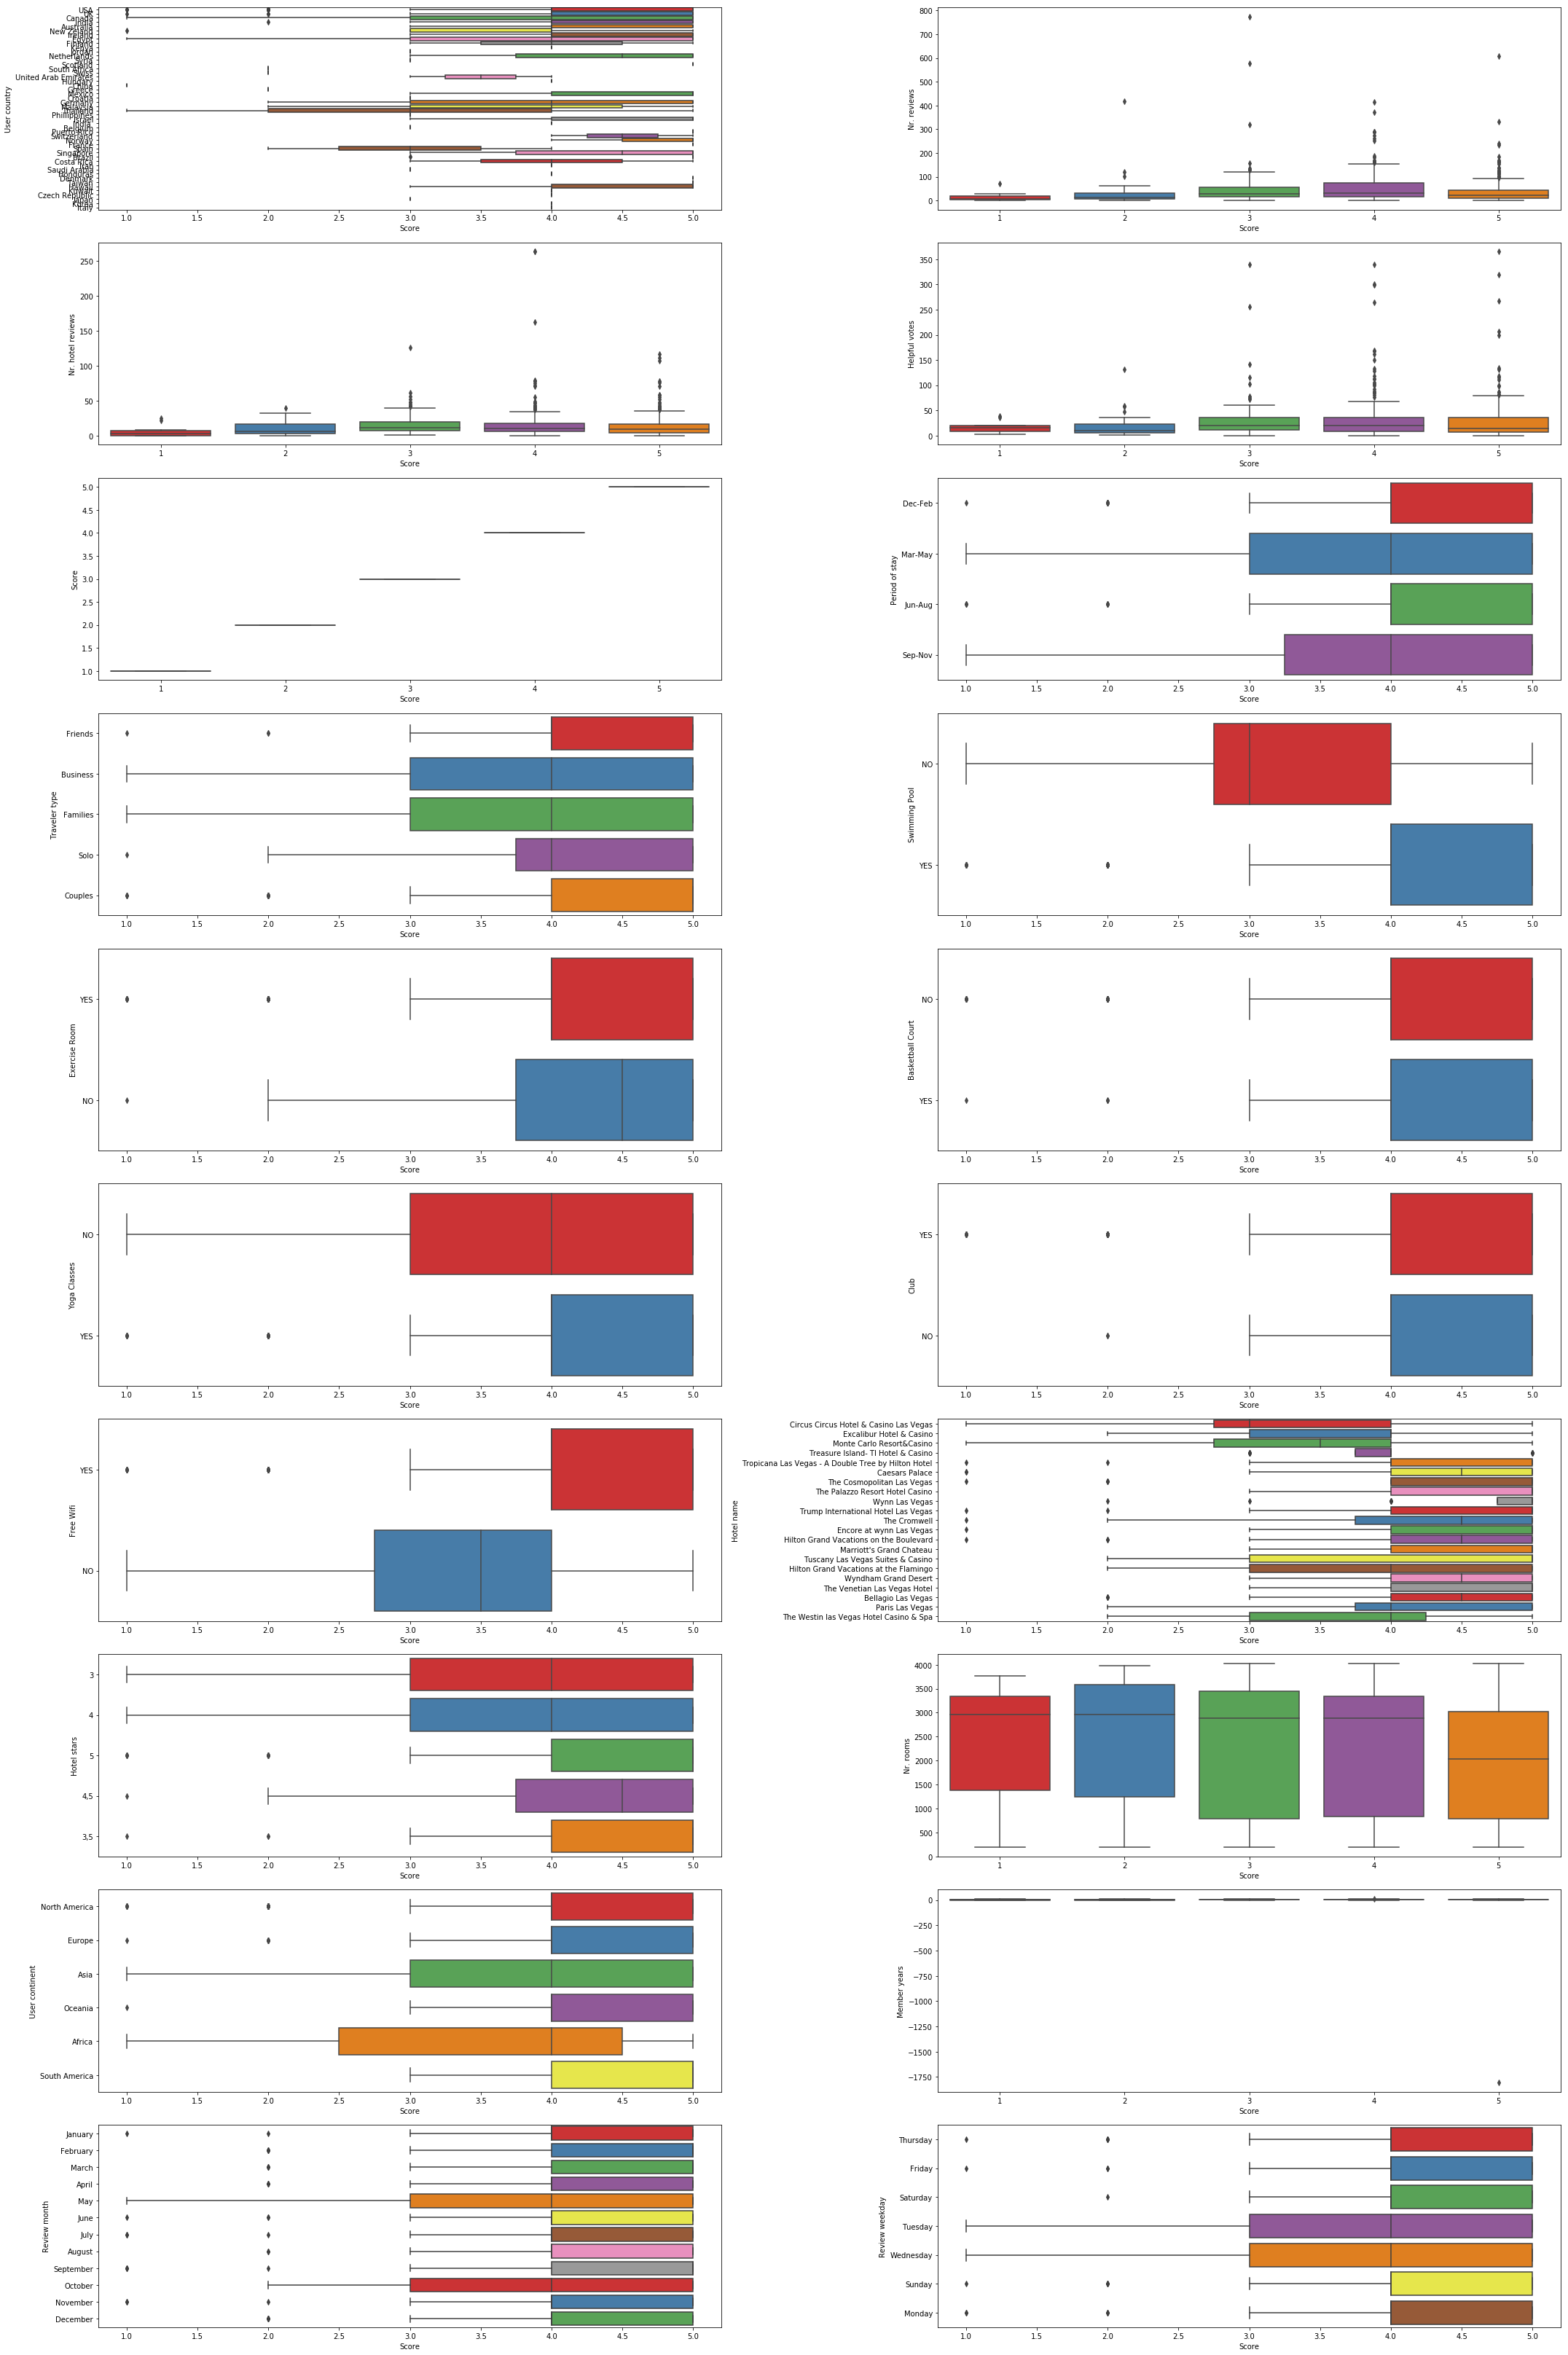

In [58]:
features1= list(df.columns[0:20])

plt.figure(figsize=(30,45))
for i, feature in enumerate(features1):
    rows = int(len(features1)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.boxplot(x='Score', y=feature, data=df, palette="Set1")

plt.tight_layout()
plt.show()

In [71]:
# for take care of Member Year negative value
for i in range(504): 
    if X.iloc[i,17] < 0:
        X.iloc[i,17] = 0
    else:
        X.iloc[i,17] = X.iloc[i,17]

In [72]:
X.drop('User country', axis=1, inplace=True)
X.drop('Hotel name', axis=1, inplace=True)
X.drop('User continent', axis=1, inplace=True)
X.drop('Review month', axis=1, inplace=True)
X.drop('Review weekday', axis=1, inplace=True)
X.drop('Nr. rooms', axis=1, inplace=True)
X.drop('Period of stay', axis=1, inplace=True)
X.head()

,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Traveler type,Swimming Pool,Exercise Room,Basketball Court,Yoga Classes,Club,Free Wifi,Hotel stars,Member years
0,11,4,13,5,Friends,NO,YES,NO,NO,YES,YES,3,9
1,119,21,75,3,Business,NO,YES,NO,NO,YES,YES,3,3
2,36,9,25,5,Families,NO,YES,NO,NO,YES,YES,3,2
3,14,7,14,4,Friends,NO,YES,NO,NO,YES,YES,3,6
4,5,5,2,4,Solo,NO,YES,NO,NO,YES,YES,3,7


In [73]:
#function for creating dummy variables
def create_dummies( df, colname ):
        col_dummies = pd.get_dummies(df[colname], prefix=colname)
        col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
        df = pd.concat([col_dummies, df], axis=1)
        df.drop( colname, axis = 1, inplace = True )
        return df

In [74]:
X = create_dummies(X, 'Traveler type')
X = create_dummies(X, 'Swimming Pool')
X = create_dummies(X, 'Exercise Room')
X = create_dummies(X, 'Basketball Court')
X = create_dummies(X, 'Yoga Classes')
X = create_dummies(X, 'Club')
X = create_dummies(X, 'Free Wifi')
X = create_dummies(X, 'Hotel stars')
X.head()
X.shape

(504, 19)

Boxplot after creating of dummy variables.

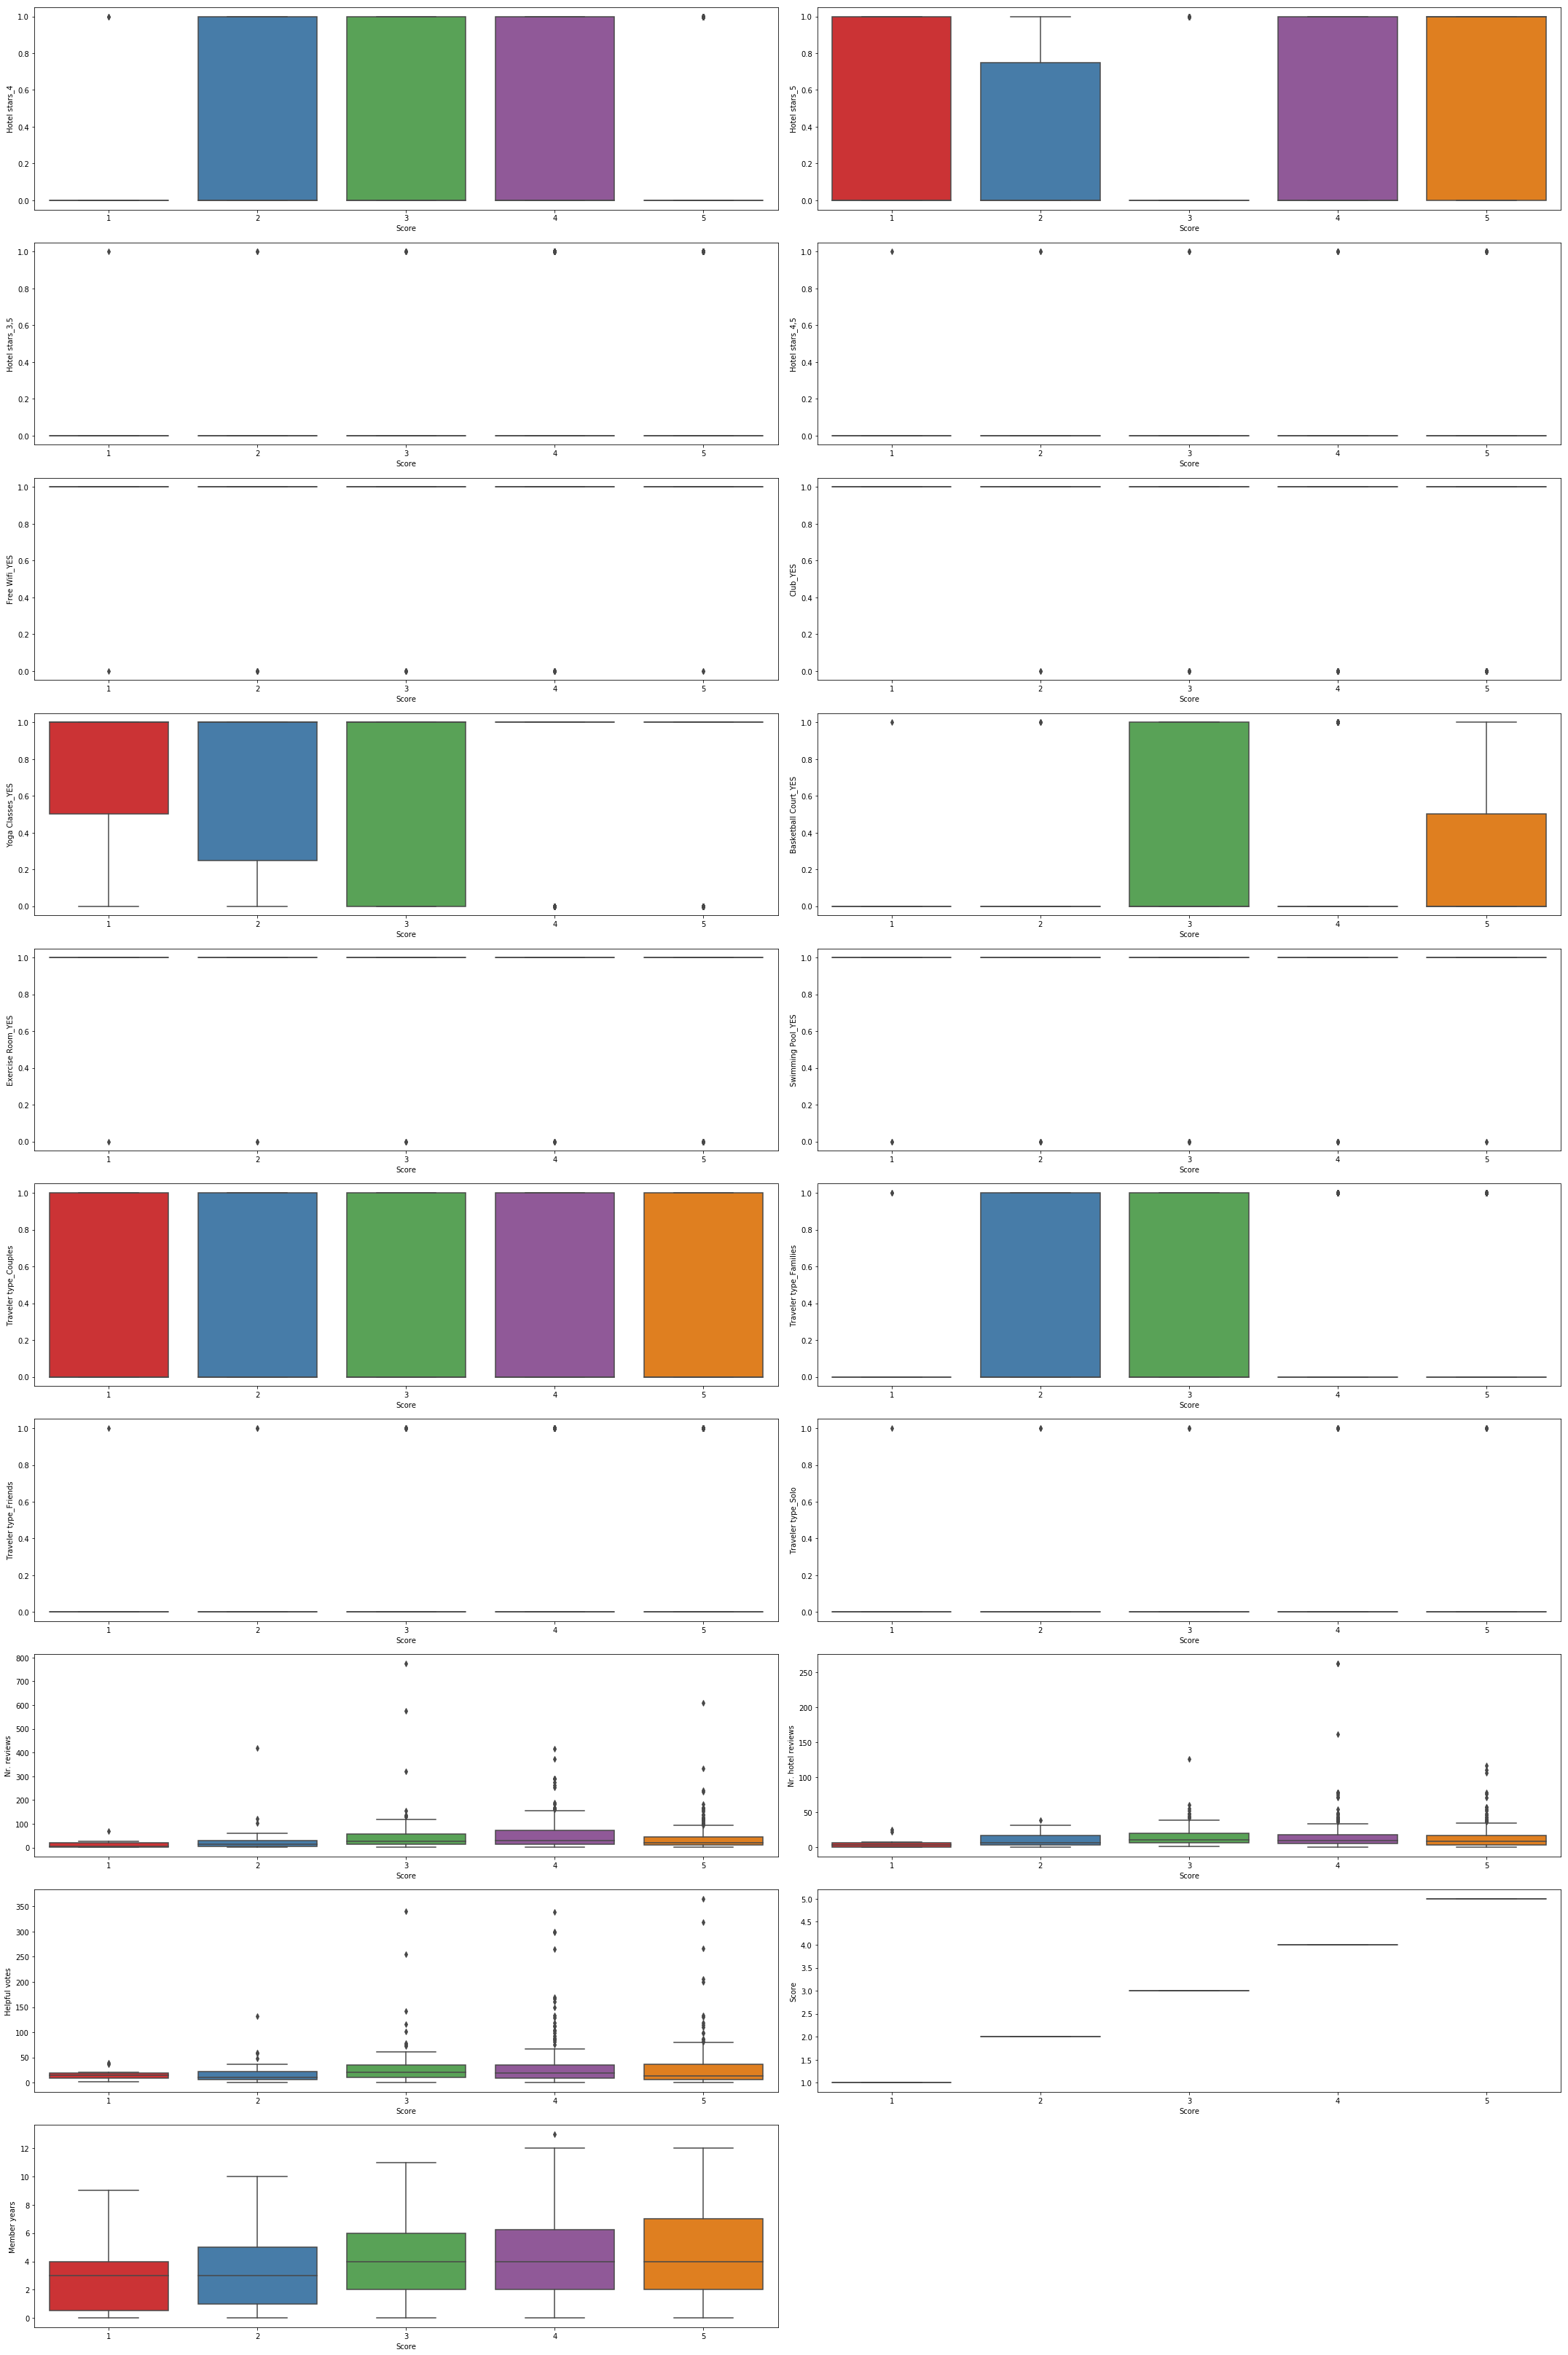

In [77]:
features2= list(X.columns[0:19])

plt.figure(figsize=(30,45))
for i, feature in enumerate(features2):
    rows = int(len(features2)/2)
    
    plt.subplot(rows+1, 2, i+1)
    
    sns.boxplot(x=X['Score'], y=feature, data=X, palette="Set1")

plt.tight_layout()
plt.show()

We can see from above we need to remove some variable

['Hotel stars_4', 'Hotel stars_5', 'Hotel stars_3,5', 'Hotel stars_4,5', 'Free Wifi_YES', 'Club_YES', 'Yoga Classes_YES', 'Basketball Court_YES', 'Exercise Room_YES', 'Swimming Pool_YES', 'Traveler type_Couples', 'Traveler type_Families', 'Traveler type_Friends', 'Traveler type_Solo', 'Nr. reviews', 'Nr. hotel reviews', 'Helpful votes', 'Score', 'Member years']


/home/sharwan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  import sys


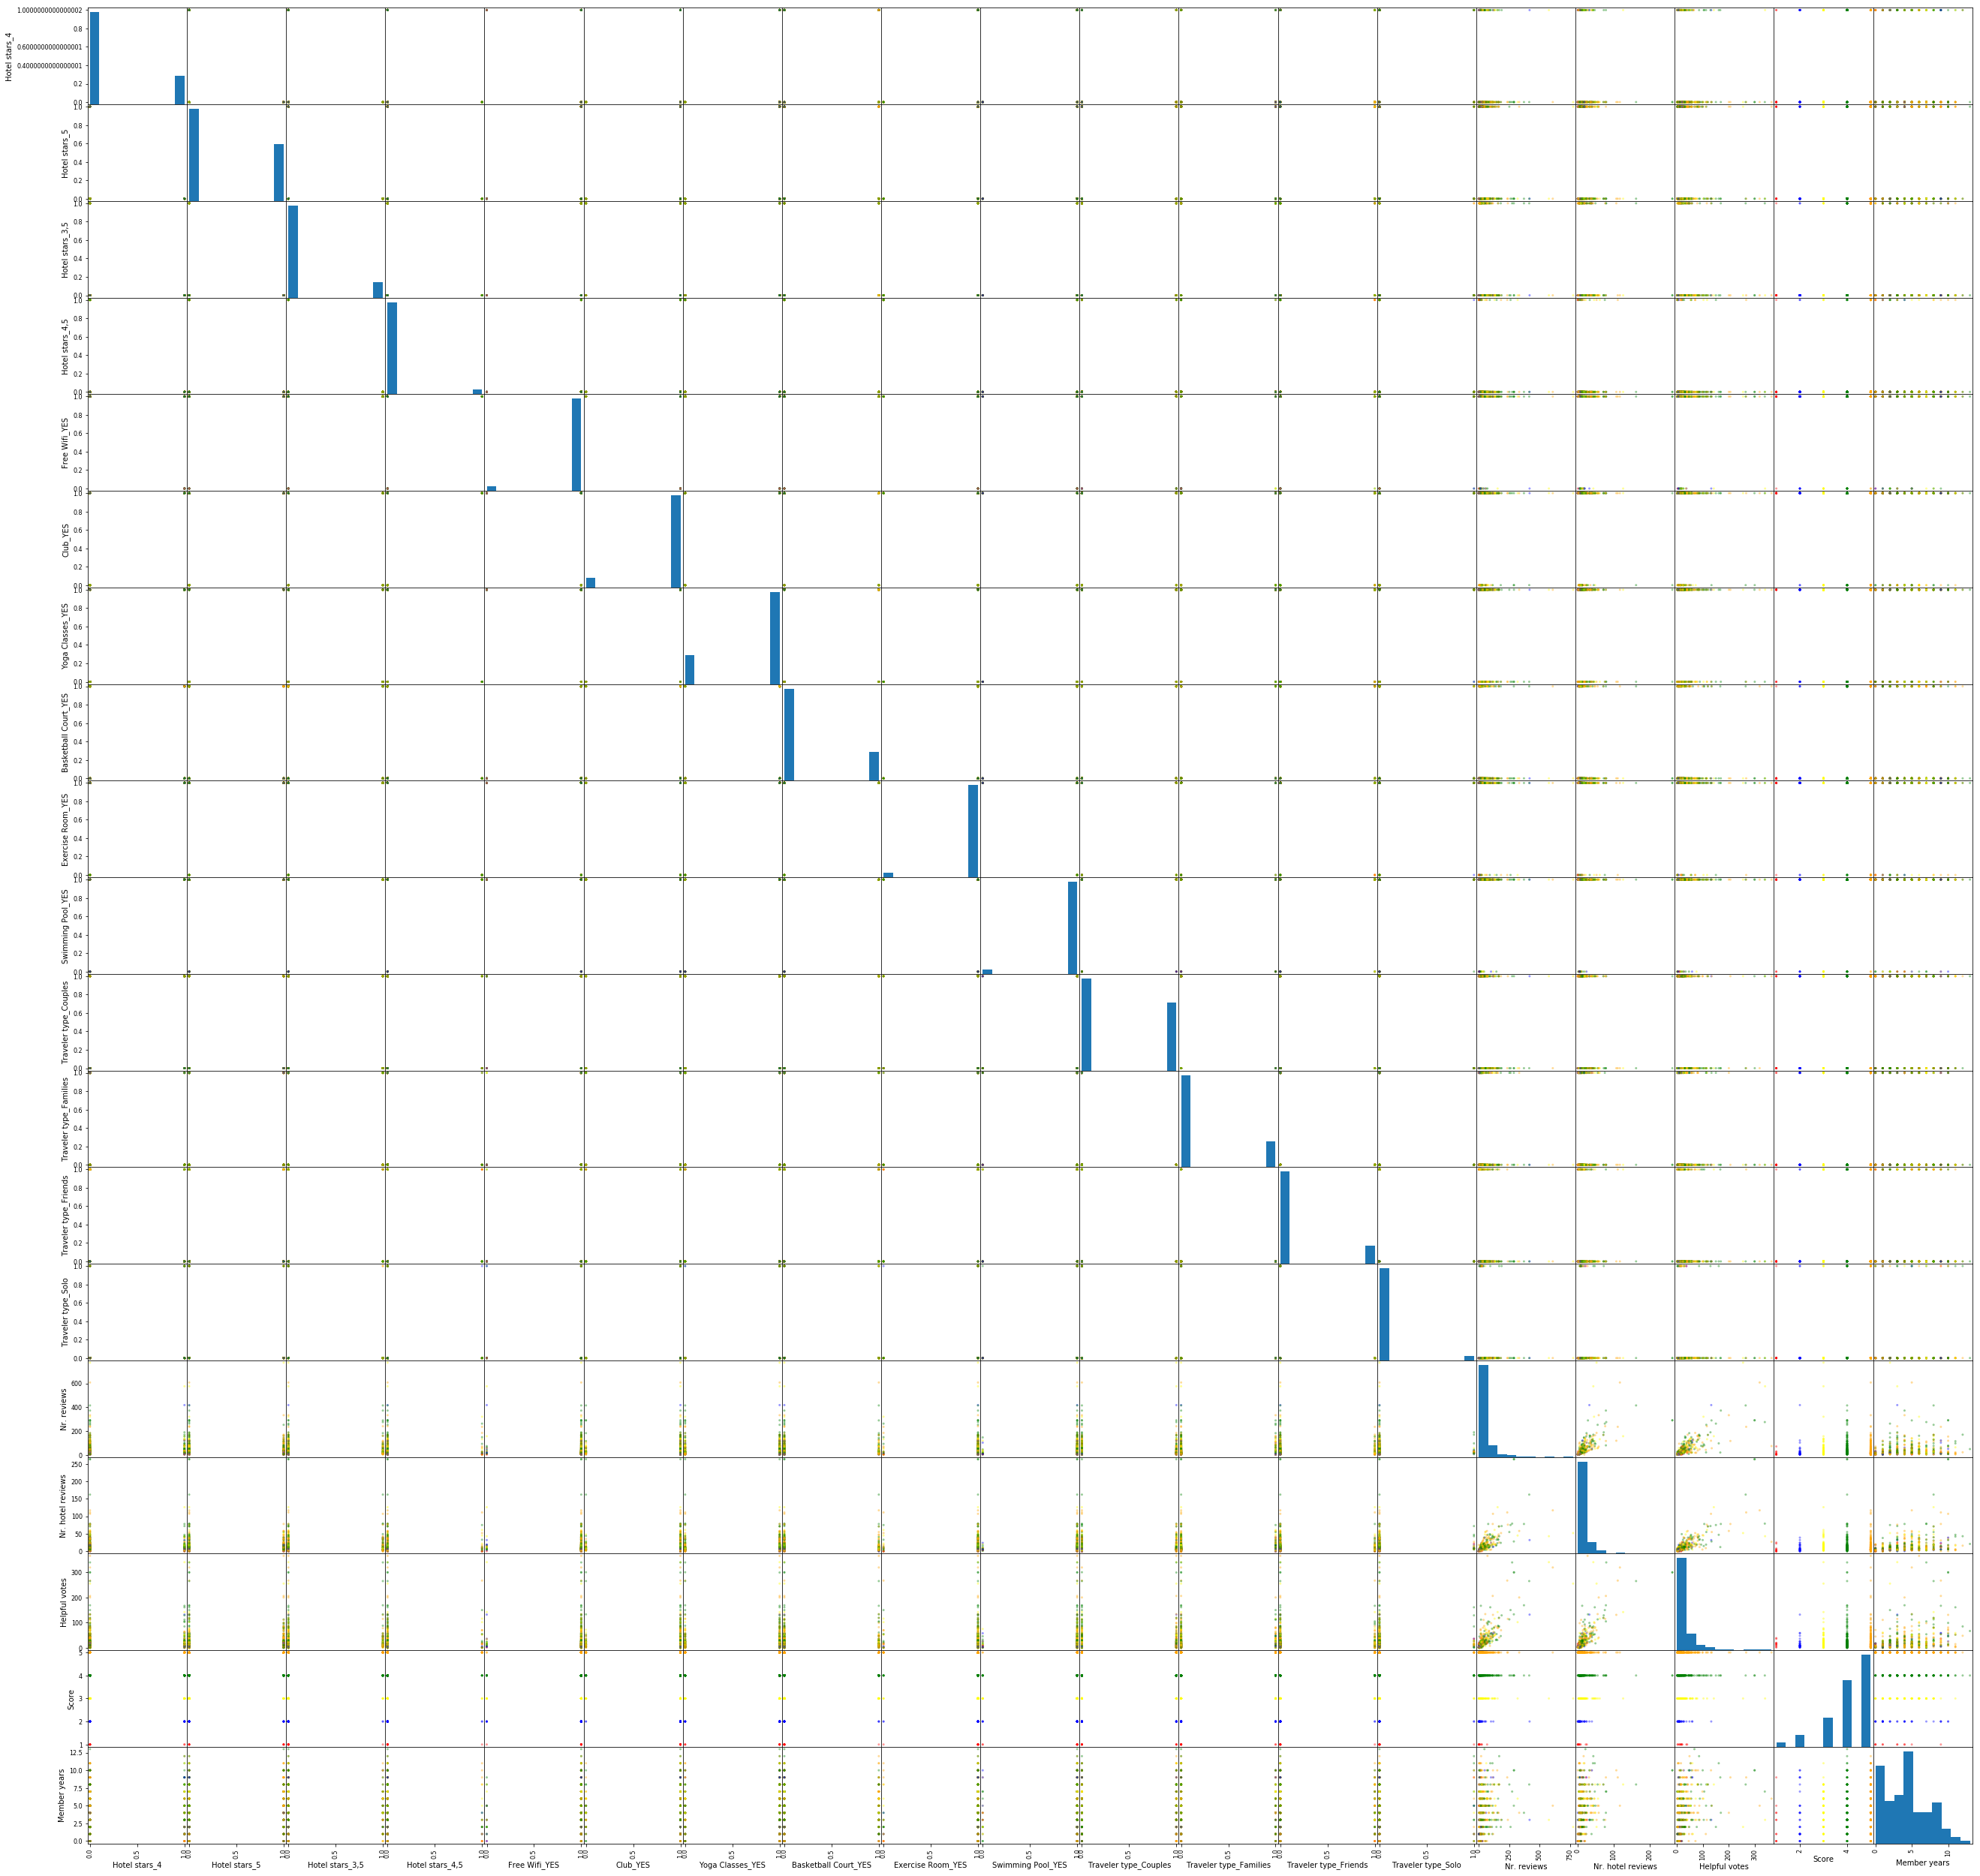

In [95]:
features3= list(X.columns[0:19])
print(features3)

color_dic = {1:'red', 2:'blue', 3:'yellow', 4:'green', 5:'orange'}
colors = X['Score'].map(lambda x: color_dic.get(x))

sm = pd.scatter_matrix(X[features3], c=colors, alpha=0.4, figsize=((45,45)));

plt.show()

In [100]:
X.drop('Score', axis=1, inplace=True)

In [78]:
y = df.iloc[:, 4].values

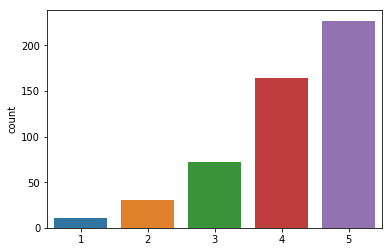

In [79]:
#plot of score count
sns.countplot(y,label="Count")

Score have 5 different classes so it is a multi-class classification poblem.
We can see that this is imbalanced data so we have to balance it.
I will apply here Oversampling followed by under sampling.

# Over sampling followed by under sampling

In [80]:
#over sampling followed by under sampling using the SMOTE and TOMEK links technique

from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)

In [81]:
list(X_smt.shape)

[1037, 19]

In [82]:
list(y_smt.shape)

[1037]

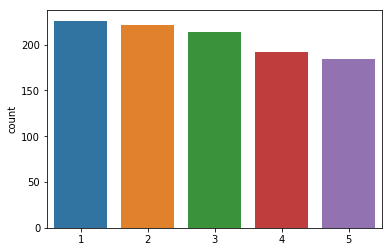

In [83]:
sns.countplot(y_smt,label="Count")

We can see that data are balanced.

Chi2 Method for most important features

In [63]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=15)
chi_selector.fit(X_norm, y)

SelectKBest(k=15, score_func=<function chi2 at 0x7fa47622dbf8>)

In [64]:
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')
print(chi_feature)

15 selected features
['Hotel stars_4', 'Hotel stars_5', 'Hotel stars_3,5', 'Hotel stars_4,5', 'Free Wifi_YES', 'Basketball Court_YES', 'Swimming Pool_YES', 'Traveler type_Couples', 'Traveler type_Families', 'Traveler type_Friends', 'Traveler type_Solo', 'Nr. reviews', 'Nr. hotel reviews', 'Helpful votes', 'Member years']


So here important features are Hotel stars, Free Wifi, Basketball Court, Swimming Pool, Traveler type,
Nr. reviews, Nr. Hotel reviews, Helpful votes, Member years.

In [19]:
#split into train ad test data train:test = 80:20
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size = 0.20, random_state = 0)

# Machine Learning 

Support Vector Machine

For all data

In [99]:
from xgboost import XGBClassifier
classifier9 = XGBClassifier(learning_rate=0.1, n_estimators=28, max_depth=7, min_child_weight=1, gamma=0, subsample=0.9, colsample_bytree=0.9, objective='multi:softmax', nthread=4, scale_pos_weight=1, seed=27, reg_alpha=0.01)
classifier9.fit(X_train, y_train)

y_pred9 = classifier9.predict(X_test)

from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
cm9 = confusion_matrix(y_test, y_pred9)
acc9 = accuracy_score(y_test, y_pred9)
print('accuracy:',acc9)
print('Confusion Matrix:')
print(cm9)
f19 = f1_score(y_test, y_pred9, average='micro') #f1 score 
print('f1 score:',f19)

accuracy: 0.7156862745098039
Confusion Matrix:
[[46  2  0  0  1]
 [ 3 36  4  3  3]
 [ 0  3 32  3  2]
 [ 2  2 10 13  6]
 [ 0  0  2 12 19]]
f1 score: 0.7156862745098039


/home/sharwan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [21]:
from sklearn.svm import SVC
classifier5 = SVC(kernel='rbf', random_state=0)
classifier5.fit(X_train, y_train)

y_pred5 = classifier5.predict(X_test)

from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
cm5 = confusion_matrix(y_test, y_pred5)
acc5 = accuracy_score(y_test, y_pred5)
print('accuracy:',acc5)
print('Confusion Matrix:')
print(cm5)
f15 = f1_score(y_test, y_pred5, average='micro') #f1 score 
print('f1 score:',f15)

accuracy: 0.7205882352941176
Confusion Matrix:
[[42  2  0  4  1]
 [ 1 38  3  2  5]
 [ 0  1 30  8  1]
 [ 0  2  5 22  4]
 [ 1  1  6 10 15]]
f1 score: 0.7205882352941176
